### RQ1: What are the distributions of developers that post questions?

In [1]:
import matplotlib.pyplot as plt

%load_ext sql
%sql sqlite:///../data/user_post.db

query = """ WITH uname_c AS (
                SELECT uname, COUNT(*) AS c
                FROM questions
                GROUP BY uname)
            SELECT c, COUNT(*)
                FROM uname_c
                GROUP BY c"""

res = %sql $query
df = res.DataFrame()
df.columns = ["# questions", "# developers"]

# Accumulate proportions
df['prop developers'] = df['# developers'].cumsum() / df['# developers'].sum()
df

 * sqlite:///../data/user_post.db
Done.


,# questions,# developers,prop developers
0,1,66195,0.856428
1,2,7295,0.950810
2,3,1977,0.976388
3,4,732,0.985859
4,5,363,0.990555
5,6,189,0.993001
6,7,151,0.994954
7,8,86,0.996067
8,9,64,0.996895
9,10,42,0.997438


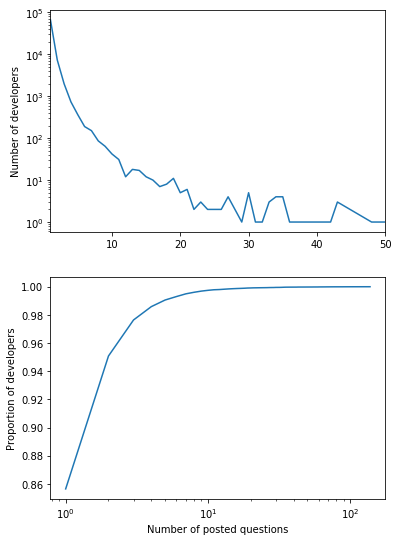

In [2]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Number of developers
ax1.set_xlim(1, 50)
ax1.set_yscale('log', basey=10)
# ax1.set_xlabel("Number of posted questions")
ax1.set_ylabel("Number of developers")
ax1.plot(df["# questions"], df["# developers"])

# Accumulater proportion of developers
ax2.set_xscale('log', basex=10)
ax2.set_xlabel("Number of posted questions")
ax2.set_ylabel("Proportion of developers")
ax2.plot(df['# questions'], df['prop developers'])

plt.show()

### RQ2: What are the distributions of developers that answer questions?

In [3]:
query = """ WITH uname_c AS (
                SELECT uname, COUNT(*) AS c
                FROM answers
                GROUP BY uname)
            SELECT c, COUNT(*)
                FROM uname_c
                GROUP BY c"""

res = %sql $query
df = res.DataFrame()
df.columns = ["# answers", "# developers"]

# Accumulate proportions
df['prop developers'] = df['# developers'].cumsum() / df['# developers'].sum()
df[1:50]

 * sqlite:///../data/user_post.db
Done.


,# answers,# developers,prop developers
1,2,16642,0.891267
2,3,5660,0.934819
3,4,2751,0.955987
4,5,1548,0.967898
5,6,924,0.975008
6,7,628,0.979840
7,8,461,0.983387
8,9,333,0.985950
9,10,238,0.987781
10,11,211,0.989405


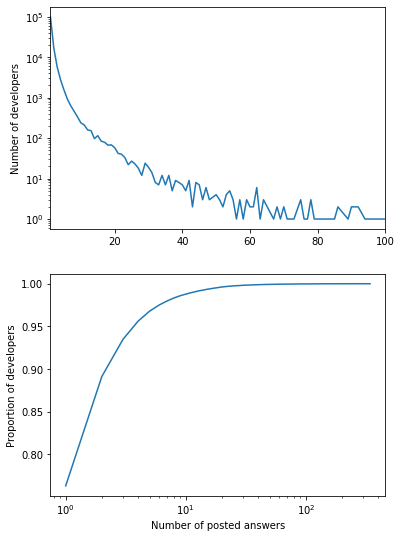

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Number of developers
ax1.set_xlim(1, 100)
ax1.set_yscale('log', basey=10)
ax1.set_ylabel("Number of developers")
ax1.plot(df["# answers"], df["# developers"])

# Accumulater proportion of developers
ax2.set_xscale('log', basex=10)
ax2.set_xlabel("Number of posted answers")
ax2.set_ylabel("Proportion of developers")
ax2.plot(df['# answers'], df['prop developers'])

plt.show()